In [1]:
#installing required packages
!pip install optuna
!pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.1 MB/s eta 0:00:00


##**Importing Libraries**

In [46]:
import pandas as pd
import numpy as np
import optuna
import os
from linearmodels.panel import PanelOLS
import statsmodels.api as sm
from optuna.integration import OptunaSearchCV as OSC
from IPython.display import display, Markdown
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Independence
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import xgboost as xgb

##**Uploading Data**

In [3]:
#loading data from google drive
drive_file_id = '1u7_RkgyY7LIA1zvArUq2YIraSmh0Gs6p'
drive_file_url = f'https://drive.google.com/uc?id={drive_file_id}'
data = pd.read_csv(drive_file_url)

#displaying data
display(data.head())

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999.0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000.0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001.0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002.0,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003.0,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


##**Cleaning Data**

In [6]:
#displaying dtypes of columns
data.dtypes

company_name     object
status_label     object
year            float64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object

In [7]:
#checking for missing values
data_na = data.isnull().sum()
data_na

company_name    0
status_label    0
year            0
X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
X9              0
X10             0
X11             0
X12             0
X13             0
X14             0
X15             0
X16             0
X17             0
X18             0
dtype: int64

In [8]:
#checking the length of dataset
len(data)

78682

In [9]:
#getting the summary of all variables
display(data.describe(include='all'))

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682,78682,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,...,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
unique,8971,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C_4081,alive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,73462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,...,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,NaN,NaN,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,...,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,NaN,NaN,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,...,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,NaN,NaN,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,...,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,NaN,NaN,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,...,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,NaN,NaN,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,...,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250


In [10]:
#renaming columns
data = data.rename(columns={'X1':'current_assets','X2':'COGS','X3':'depr_and_amort','X4':'EBITDA','X5':'inventory','X6':'net_income',
                            'X7':'total_receivables','X8':'market_value','X9':'net_sales','X10':'total_assets','X11':'total_long_term_debt',
                            'X12':'EBIT','X13':'gross_profit','X14':'total_current_liabilities','X15':'retained_earnings','X16':'total_revenue',
                            'X17':'total_liabilities','X18':'total_operating_expenses'})

In [11]:
list(data.columns)

['company_name',
 'status_label',
 'year',
 'current_assets',
 'COGS',
 'depr_and_amort',
 'EBITDA',
 'inventory',
 'net_income',
 'total_receivables',
 'market_value',
 'net_sales',
 'total_assets',
 'total_long_term_debt',
 'EBIT',
 'gross_profit',
 'total_current_liabilities',
 'retained_earnings',
 'total_revenue',
 'total_liabilities',
 'total_operating_expenses']

##**Computing Altman Ratios**

In [12]:
# Calculate financial metrics
data['X1'] = (data['current_assets'] - data['total_current_liabilities']) / data['total_assets']
data['X2'] = data['retained_earnings'] / data['total_assets']
data['X3'] = data['EBIT'] / data['total_assets']
data['X4'] = data['market_value'] / data['total_long_term_debt']
data['X5'] = data['net_sales'] / data['total_assets']

# Drop original variables used for calculations
data.drop(['current_assets', 'COGS', 'depr_and_amort', 'EBITDA', 'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales', 'total_assets',
           'total_long_term_debt', 'EBIT', 'gross_profit', 'total_current_liabilities', 'retained_earnings', 'total_revenue', 'total_liabilities',
           'total_operating_expenses'], axis=1, inplace=True)

data.head()

,company_name,status_label,year,X1,X2,X3,X4,X5
0,C_1,alive,1999.0,0.468896,0.271291,0.095355,2.065714,1.382369
1,C_1,alive,2000.0,0.513588,0.290751,0.065241,2.095251,1.245637
2,C_1,alive,2001.0,0.402974,0.196569,0.006633,1.674756,0.899355
3,C_1,alive,2002.0,0.280849,0.180749,0.005204,0.870468,0.883074
4,C_1,alive,2003.0,0.424286,0.185938,0.029341,1.242257,0.919167


In [13]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

##**Exploratory Data Analysis**

In [14]:
#binerization of target variable
data['status_label'] = data['status_label'].map({'alive': 0, 'failed': 1})

###**Plotting Data**

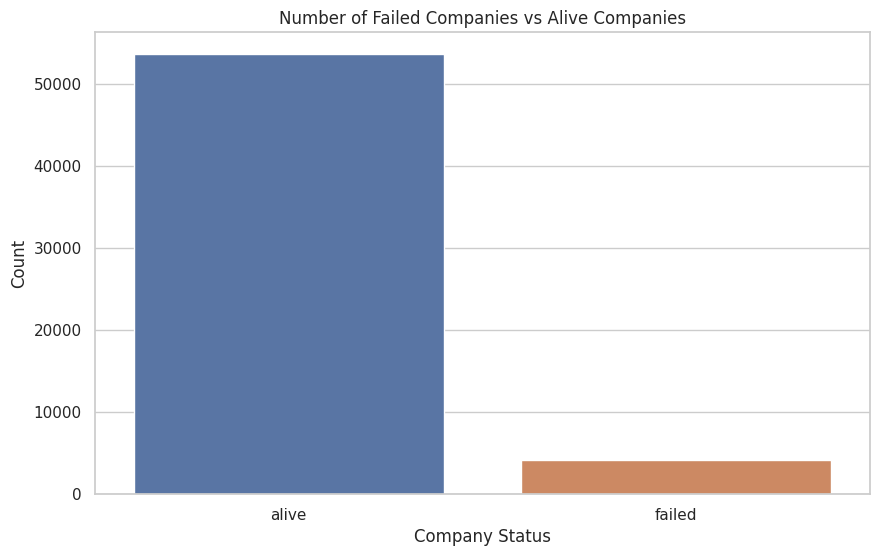

In [15]:
#checking distribution of failed companies vs alive companies
sns.set(style="whitegrid")
status_counts = data['status_label'].value_counts()
status_labels = ["alive", "failed"]
plt.figure(figsize=(10, 6))
sns.barplot(x=status_labels, y=status_counts)
plt.title('Number of Failed Companies vs Alive Companies')
plt.ylabel('Count')
plt.xlabel('Company Status')

plt.show()

From this graph, we can see that there is a significant class imbalance in our dataset, with a much larger number of alive companies compared to failed ones. This imbalance indicates that the minority class (failed companies) is underrepresented. This presents a challenge for predictive modeling, as it can lead to a bias towards the majority class and potentially reduce the accuracy of predictions for the minority class.

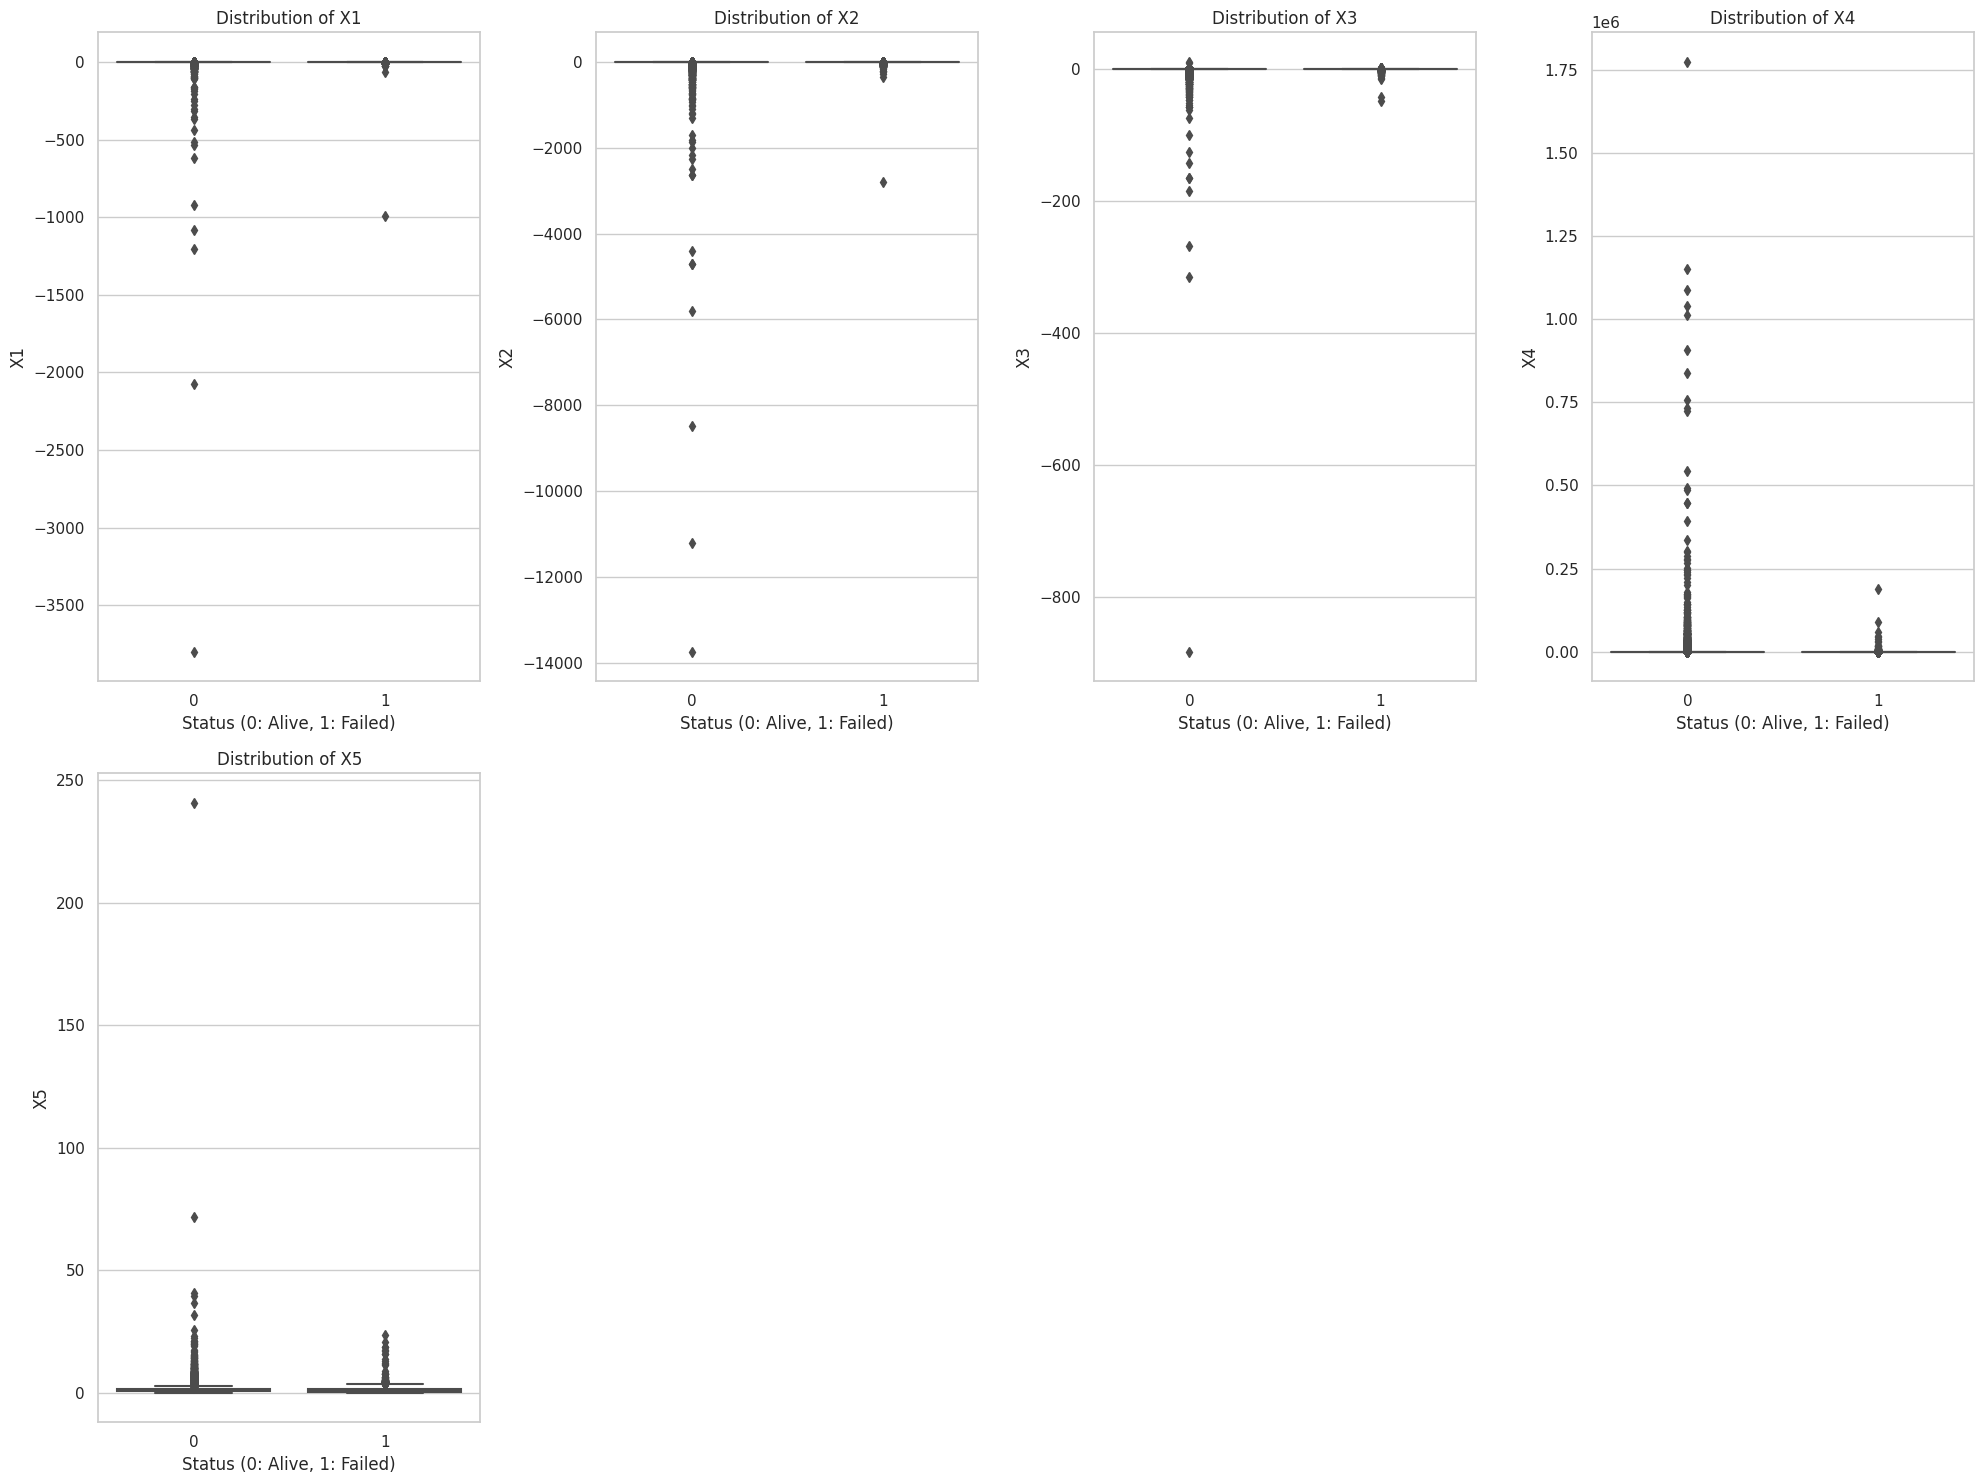

In [16]:
#features Distribution in Alive and Failed Companies
selected_features = list(data.columns)[3:]
num_features = len(selected_features)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(20, 15))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x='status_label', y=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Status (0: Alive, 1: Failed)')


plt.tight_layout()
plt.show()


The set of charts provided displays the distribution of various financial features based on the status label, where '1' represents failed companies and '0' represents alive companies. Across all features, we can observe an overlap in the data points for both classes.

For example, the range of current assets for failed companies (Status 1) falls entirely within the range of current assets for alive companies (Status 0). Specifically, the overlap occurs in the lower range of current assets. Since all the data points for failed companies (Status 1) are also covered by the spread of points for alive companies (Status 0), the overlap is in the entire range of current assets values represented by failed companies.

This may be attributed to the ground reality that even though a company is not going bankrupt, it may still be undergoing financial distress or events like leveraged buyouts, restructuring, or significant shifts in market conditions that affect its financial metrics similarly to a failing company.

Financial distress can significantly reduce a company's liquidity and current assets, even if it does not lead to bankruptcy. For instance, a company engaged in a leveraged buyout might take on substantial debt, reducing its net current assets. Such scenarios can cause the financial profiles of distressed but still 'alive' companies to resemble those of companies that are actually going bankrupt, leading to the observed overlap in the distribution of current assets between the two groups.

This overlap suggests that for any given financial metric, there are both alive and failed companies with similar values, making it challenging to distinguish between the two. Consequently, this could complicate the task of building a predictive model, as it would require more sophisticated techniques or additional features to effectively separate the classes and accurately predict the likelihood of a company going bankrupt.

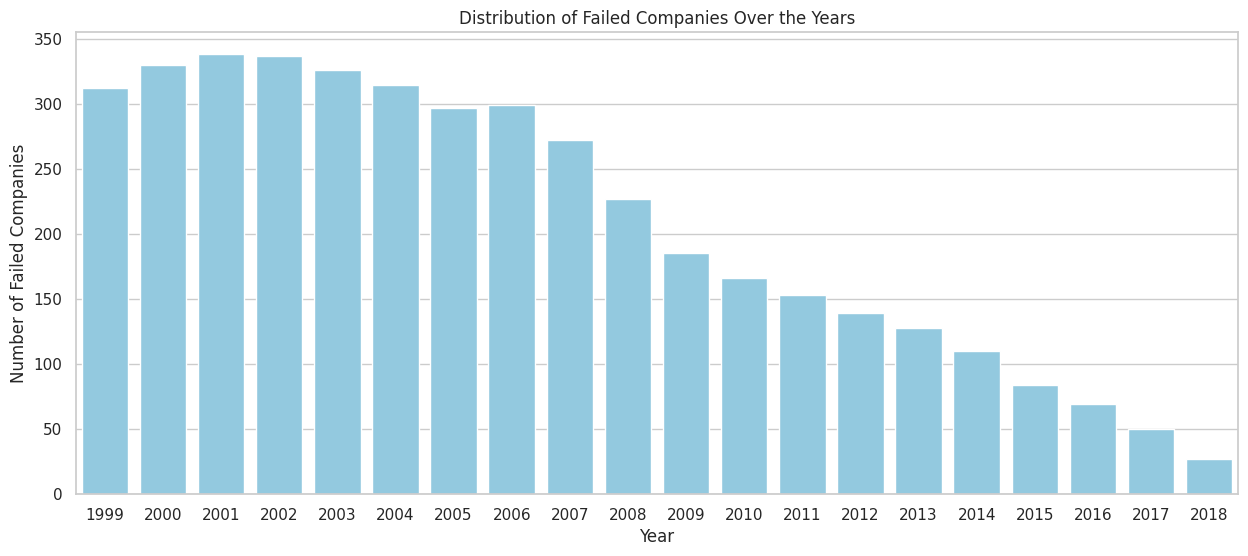

In [17]:
#distribution of failed companies over the years
failed_companies_by_year = data[data['status_label'] == 1]['year'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
sns.barplot(x=failed_companies_by_year.index.astype(int), y=failed_companies_by_year.values, color='skyblue')
plt.title('Distribution of Failed Companies Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Failed Companies')

plt.show()


The graph indicates a notable decrease in the number of company bankruptcies after the 2007 financial crisis. This decline could be due to stricter financial regulations and more cautious business practices. As a result, bankruptcies have become more infrequent, exacerbating the class imbalance in the data, particularly in the years following the crisis. This makes it challenging for predictive models to learn from a dwindling number of failure cases, potentially affecting their accuracy in forecasting future bankruptcies.

##**Preparing Datasets**

Panel data is a dataset that contains observations on a set of entities—such as individuals, organizations, or countries, across time. Our data qualifies as panel data because it tracks various financial metrics for a set of companies over several years.

Standard regression models typically assume that each observation is independent of the others. However, in panel data, observations for the same entity are likely to be correlated over time, violating this assumption. This is why panel data cannot be directly used in classical regression models without adjustments to allow for cross-sectional analysis (where each sample is considered independant)

To analyze such panel data effectively, we employ three different techniques, each offering a unique lens:

1. **Using Lagged Values:** By analyzing the data in its original form, we can observe how each company's metrics evolve over time, thus maintaining the integrity of the temporal information.

2. **Handling as Panel Data:** It leverages the data's longitudinal structure to examine temporal trends and the evolution of financial health over time.

3. **Cross-sectional Snapshots:** We take a specific time slice of data for each company, effectively treating each company's selected observation as independent. Simplifying the data to one year observation per company allows us to focus on specific years, particularly important in contrasting the conditions between companies that failed and those that did not at a particular time.

###**Dataset 1 - Using Lagged Values**

Company-year as separate sample with lag values

In [20]:
column_names = list(data.columns)
column_names = column_names[3:]

#creating lag features for financial metrics (lag of 2 year)
dataset1 = data.copy()
for col in column_names:
    dataset1[col + '_lag2'] = dataset1.groupby('company_name')[col].shift(2)

lagged_columns = [col for col in dataset1.columns if '_lag2' in col or col in ['company_name', 'year', 'status_label']]
dataset1 = dataset1[lagged_columns]

#removing rows with NaN values created due to lag
dataset1.dropna(inplace=True)

###**Dataset 2 - Handling as Panel Data**

Handling as panel data. For panel data, the structure remains the same but will be treated differently in the modeling phase

In [21]:
dataset2 = data.copy()

###**Dataset 3- Cross-sectional Snapshots**

1. For failed companies, get the data 2 years prior to the last year
2. For alive companies, randomly select a year where 2 years prior data is available

In [22]:
#failed companies
failed_companies = data[data['status_label'] == 1]['company_name'].unique()
data_failed_list = []
for company in failed_companies:
    last_year = data[(data['company_name'] == company) & (data['status_label'] == 1)]['year'].max()
    data_failed_list.append(data[(data['company_name'] == company) & (data['year'] == last_year - 2)])

data_failed = pd.concat(data_failed_list, ignore_index=True)

#alive companies
alive_companies = data[data['status_label'] == 0]['company_name'].unique()
data_alive_list = []
for company in alive_companies:
    available_years = data[(data['company_name'] == company) & (data['status_label'] == 0)]['year'].unique()
    available_years = [year for year in available_years if year - 2 in available_years]
    if available_years:
        random.seed(42)
        selected_year = random.choice(available_years)
        data_alive_list.append(data[(data['company_name'] == company) & (data['year'] == selected_year)])

data_alive = pd.concat(data_alive_list, ignore_index=True)

#combining failed and alive companies
dataset3 = pd.concat([data_failed, data_alive], ignore_index=True)


##**Temporal train-test Splitting**
Training set includes data until the year 2014, and test set includes data from 2015 onwards

In [23]:
#splitting for Dataset 1
train_dataset1 = dataset1[dataset1['year'] <= 2014]
test_dataset1 = dataset1[dataset1['year'] > 2014]

#splitting for Dataset 2
train_dataset2 = dataset2[dataset2['year'] <= 2014]
test_dataset2 = dataset2[dataset2['year'] > 2014]

#splitting for Dataset 3
train_dataset3 = dataset3[dataset3['year'] <= 2014]
test_dataset3 = dataset3[dataset3['year'] > 2014]

#displaying shapes
(train_dataset1.shape, test_dataset1.shape), (train_dataset2.shape, test_dataset2.shape), (train_dataset3.shape, test_dataset3.shape)


(((34971, 8), (8097, 8)), ((48638, 8), (9160, 8)), ((4687, 8), (1057, 8)))

##**Balancing Data**

In [24]:
#creating a function to balance the data
def balance_data(data):
    #separating majority and minority classes
    data_majority = data[data.status_label == 0]
    data_minority = data[data.status_label == 1]

    #downsampling majority class
    data_majority_downsampled = resample(data_majority,
                                         replace=False,
                                         n_samples=len(data_minority),
                                         random_state=123)

    return pd.concat([data_majority_downsampled, data_minority])

#balancing dataset 1
train_dataset1 = balance_data(train_dataset1)

#balancing dataset 2
minority_count = train_dataset2[train_dataset2['status_label'] == 1].shape[0]
majority_downsampled = resample(train_dataset2[train_dataset2['status_label'] == 0],
                                replace=False,
                                n_samples=minority_count,
                                random_state=123)
train_dataset2 = pd.concat([majority_downsampled, train_dataset2[train_dataset2['status_label'] == 1]])

#balancing dataset 3
train_dataset3 = balance_data(train_dataset3)

print(train_dataset1.shape, train_dataset2.shape, train_dataset3.shape)

(5666, 8) (7866, 8) (838, 8)


##**Running Models on Dataset2**

###**Standardizing Data**

In [25]:
#defining function to standardize data
def standardizing_data_for_modeling(train_dataset, test_dataset):
    cols_to_exclude = ['status_label', 'company_name', 'year']
    cols_to_standardize = train_dataset.columns.difference(cols_to_exclude)

    scaler = StandardScaler()
    train_dataset[cols_to_standardize] = scaler.fit_transform(train_dataset[cols_to_standardize])
    test_dataset[cols_to_standardize] = scaler.transform(test_dataset[cols_to_standardize])
    print("Shapes after scaling:")
    print(train_dataset[cols_to_standardize].shape)
    print(test_dataset[cols_to_standardize].shape)

    print("Shapes before dropping columns:")
    print(train_dataset.shape)
    print(test_dataset.shape)

    y_train = train_dataset['status_label']
    X_train = train_dataset.drop(['status_label', 'company_name', 'year'], axis=1)
    y_test = test_dataset['status_label']
    X_test = test_dataset.drop(['status_label', 'company_name', 'year'], axis=1)

    print("Shapes after splitting into X and y:")
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)

    return X_train, y_train, X_test, y_test

###**GEE Method**

In [26]:
#company_name is used as the group variable
groups = train_dataset2['company_name']

#standardizing data
gee_train_dataset2 = train_dataset2.copy()
gee_test_dataset2 = test_dataset2.copy()
gee_X_train, gee_y_train, gee_X_test, gee_y_test = standardizing_data_for_modeling(gee_train_dataset2, gee_test_dataset2)

gee_X_train = sm.add_constant(gee_X_train)

#defining and fitting GEE model
gee_model = GEE(gee_y_train, gee_X_train, groups=groups, family=sm.families.Binomial(), cov_struct=Independence())
gee_results = gee_model.fit()

print(gee_results.summary())


Shapes after scaling:
(7866, 5)
(9160, 5)
Shapes before dropping columns:
(7866, 8)
(9160, 8)
Shapes after splitting into X and y:
(7866, 5) (7866,)
(9160, 5) (9160,)
                               GEE Regression Results                              
Dep. Variable:                status_label   No. Observations:                 7866
Model:                                 GEE   No. clusters:                     3274
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                  16
Family:                           Binomial   Mean cluster size:                 2.4
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Fri, 15 Dec 2023   Scale:                           1.000
Covariance type:                    robust   Time:                         16:58:01
                 coef    std err          z      P>|z|      [0.025      0.975

In [27]:
gee_X_test = sm.add_constant(gee_X_test)

#using class counts offset to account for the class imbalance
class_counts = train_dataset2['status_label'].value_counts()

#getting the predicted probabilities
gee_predicted_probs = gee_results.predict(gee_X_test, offset=np.log(class_counts[0] / class_counts[1]))
threshold = 0.52
gee_predicted_classes = (gee_predicted_probs > threshold).astype(int)

#evaluating model
gee_cm = confusion_matrix(gee_y_test, gee_predicted_classes)
TN, FP, FN, TP = gee_cm.ravel()
gee_accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
gee_recall = TP / (TP + FN) * 100
gee_cm_df = pd.DataFrame(gee_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Accuracy: {:.2f}%".format(gee_accuracy))
print("Recall: {:.2f}%".format(gee_recall))
print("\n")
print(gee_cm_df)

Accuracy: 96.72%
Recall: 2.17%


                 Predicted Negative  Predicted Positive
Actual Negative                8855                  75
Actual Positive                 225                   5


###**Gradient Boosting Machines (GBM)**

In [29]:
#standardizing data
gb_train_dataset2 = train_dataset2.copy()
gb_test_dataset2 = test_dataset2.copy()
gb_X_train, gb_y_train, gb_X_test, gb_y_test = standardizing_data_for_modeling(gb_train_dataset2, gb_test_dataset2)

#training the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(gb_X_train, gb_y_train)

#predicting on the test set
gb_y_pred = xgb_model.predict(gb_X_test)

#evaluating model
gb_cm = confusion_matrix(gb_y_test, gb_y_pred)
TN, FP, FN, TP = gb_cm.ravel()
gb_accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
gb_recall = TP / (TP + FN) * 100
gb_cm_df = pd.DataFrame(gb_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Accuracy: {:.2f}%".format(gb_accuracy))
print("Recall: {:.2f}%".format(gb_recall))
print("\n")
print(gb_cm_df)

Shapes after scaling:
(7866, 5)
(9160, 5)
Shapes before dropping columns:
(7866, 8)
(9160, 8)
Shapes after splitting into X and y:
(7866, 5) (7866,)
(9160, 5) (9160,)
Accuracy: 62.51%
Recall: 84.35%


                 Predicted Negative  Predicted Positive
Actual Negative                5532                3398
Actual Positive                  36                 194


###**Long Short-Term Memory (LSTM) Networks**

In [30]:
lstm_train_data = dataset2[dataset2['year'] <= 2014]
lstm_test_data = dataset2[dataset2['year'] > 2014]

max_steps = dataset2['company_name'].value_counts().max()

def create_sequences(data, max_steps):
    X, y = [], []
    for company in data['company_name'].unique():
        company_data = data[data['company_name'] == company]
        seq_x = company_data.drop(['company_name', 'year', 'status_label'], axis=1).values
        seq_y = company_data['status_label'].values[-1]
        X.append(seq_x)
        y.append(seq_y)
    X_padded = pad_sequences(X, maxlen=max_steps, padding='post', dtype='float32')
    return np.array(X_padded), np.array(y)

lstm_X_train, lstm_y_train = create_sequences(lstm_train_data, max_steps)
lstm_X_test, lstm_y_test = create_sequences(lstm_test_data, max_steps)

#standarding data
scaler = StandardScaler()
lstm_X_train_scaled = np.array([scaler.fit_transform(x) for x in lstm_X_train])
lstm_X_test_scaled = np.array([scaler.transform(x) for x in lstm_X_test])

def create_model(trial):
    lstm_units = trial.suggest_categorical('lstm_units', [50, 100, 200])

    n_steps = lstm_X_train_scaled.shape[1]
    n_features = lstm_X_train_scaled.shape[2]

    lstm_model = Sequential()
    lstm_model.add(LSTM(lstm_units, activation='relu', input_shape=(n_steps, n_features)))
    lstm_model.add(Dense(1, activation='sigmoid'))

    lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall()])

    return lstm_model

def objective(trial):
    lstm_model = create_model(trial)
    lstm_model.fit(lstm_X_train_scaled, lstm_y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    loss, recall = lstm_model.evaluate(lstm_X_test_scaled, lstm_y_test, verbose=0)
    return recall

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, n_jobs=-1)

#getting best hyperparameters
lstm_best_hyperparams = study.best_trial.params
print("Best hyperparameters: ", lstm_best_hyperparams)

#running final model
lstm_final_model = create_model(optuna.trial.FixedTrial(lstm_best_hyperparams))
lstm_final_model.fit(lstm_X_train_scaled, lstm_y_train, epochs=100, batch_size=32, validation_split=0.2)

#predicting on test data
lstm_y_pred_probs = lstm_final_model.predict(lstm_X_test_scaled)
lstm_y_pred = (lstm_y_pred_probs > 0.5).astype(int)

#evaluating model
lstm_cm = confusion_matrix(lstm_y_test, lstm_y_pred.flatten())
TN, FP, FN, TP = lstm_cm.ravel()
lstm_accuracy = (TP + TN) / (TP + TN + FP + FN) * 100
lstm_recall = TP / (TP + FN) * 100
lstm_cm_df = pd.DataFrame(lstm_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("Accuracy: {:.2f}%".format(lstm_accuracy))
print("Recall: {:.2f}%".format(lstm_recall))
print("\n")
print("Confusion Matrix DataFrame:")
print(lstm_cm_df)

[I 2023-12-15 17:00:42,446] A new study created in memory with name: no-name-c8209dc6-7a8a-457e-b89a-426cd9347730
[I 2023-12-15 17:03:18,183] Trial 0 finished with value: 0.3265306055545807 and parameters: {'lstm_units': 200}. Best is trial 0 with value: 0.3265306055545807.
[I 2023-12-15 17:04:02,784] Trial 2 finished with value: 0.030612245202064514 and parameters: {'lstm_units': 50}. Best is trial 0 with value: 0.3265306055545807.
[I 2023-12-15 17:04:11,901] Trial 1 finished with value: 0.0 and parameters: {'lstm_units': 200}. Best is trial 0 with value: 0.3265306055545807.
[I 2023-12-15 17:05:06,089] Trial 4 finished with value: 0.020408162847161293 and parameters: {'lstm_units': 100}. Best is trial 0 with value: 0.3265306055545807.
[I 2023-12-15 17:05:29,775] Trial 3 finished with value: 0.13265305757522583 and parameters: {'lstm_units': 100}. Best is trial 0 with value: 0.3265306055545807.
[I 2023-12-15 17:05:51,474] Trial 5 finished with value: 0.0 and parameters: {'lstm_units': 

Best hyperparameters:  {'lstm_units': 200}
Epoch 1/100
184/184 [==============================] - 12s 48ms/step - loss: 0.2842 - recall: 0.0023 - val_loss: 0.3114 - val_recall: 0.0000e+00
Epoch 2/100
184/184 [==============================] - 9s 48ms/step - loss: 0.2630 - recall: 0.0000e+00 - val_loss: 0.2880 - val_recall: 0.0000e+00
Epoch 3/100
184/184 [==============================] - 10s 52ms/step - loss: 0.2469 - recall: 0.0000e+00 - val_loss: 0.2938 - val_recall: 0.0000e+00
Epoch 4/100
184/184 [==============================] - 9s 47ms/step - loss: 0.2384 - recall: 0.0000e+00 - val_loss: 0.2936 - val_recall: 0.0000e+00
Epoch 5/100
184/184 [==============================] - 10s 54ms/step - loss: 0.2334 - recall: 0.0000e+00 - val_loss: 0.2782 - val_recall: 0.0000e+00
Epoch 6/100
184/184 [==============================] - 10s 52ms/step - loss: 0.2314 - recall: 0.0000e+00 - val_loss: 0.3048 - val_recall: 0.0000e+00
Epoch 7/100
184/184 [==============================] - 8s 44ms/step -

##**Running Models on Dataset 1**

###**Logistic Regression**

In [31]:
def run_optimized_logistic_regression(train_data, test_data):
    X_train, y_train, X_test, y_test = standardizing_data_for_modeling(train_data, test_data)

    def objective(trial):
        param_distributions = {
            'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
            'max_iter': trial.suggest_int('max_iter', 50, 500)
        }
        model = LogisticRegression(**param_distributions)
        return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100, n_jobs=-1)

    best_params = study.best_trial.params
    model = LogisticRegression(**best_params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, recall, cm

In [32]:
lr_train_dataset1 = train_dataset1.copy()
lr_test_dataset1 = test_dataset1.copy()
lr_data1_accuracy, lr_data1_recall, lr_data1_cm = run_optimized_logistic_regression(lr_train_dataset1, lr_test_dataset1)
lr_data1_cm_df = pd.DataFrame(lr_data1_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(lr_data1_accuracy))
print("Recall: {:.2f}%".format(lr_data1_recall))
print('Confusion Matrix:')
print(lr_data1_cm_df)

[I 2023-12-15 17:33:31,307] A new study created in memory with name: no-name-bd65613f-5e8a-4758-8b45-143b0a1a56af


Shapes after scaling:
(5666, 5)
(8097, 5)
Shapes before dropping columns:
(5666, 8)
(8097, 8)
Shapes after splitting into X and y:
(5666, 5) (5666,)
(8097, 5) (8097,)


[I 2023-12-15 17:33:33,630] Trial 1 finished with value: 0.41771811649376406 and parameters: {'C': 1607106.0669934284, 'max_iter': 477}. Best is trial 1 with value: 0.41771811649376406.
[I 2023-12-15 17:33:33,642] Trial 0 finished with value: 0.41771811649376406 and parameters: {'C': 37578.42441320797, 'max_iter': 163}. Best is trial 1 with value: 0.41771811649376406.
[I 2023-12-15 17:33:33,817] Trial 2 finished with value: 0.41771811649376406 and parameters: {'C': 213191.44878965028, 'max_iter': 261}. Best is trial 1 with value: 0.41771811649376406.
[I 2023-12-15 17:33:33,822] Trial 3 finished with value: 0.41771811649376406 and parameters: {'C': 190463067.08482978, 'max_iter': 62}. Best is trial 1 with value: 0.41771811649376406.
[I 2023-12-15 17:33:33,982] Trial 4 finished with value: 0.4152324071678783 and parameters: {'C': 0.43262326771015264, 'max_iter': 123}. Best is trial 1 with value: 0.41771811649376406.
[I 2023-12-15 17:33:33,986] Trial 5 finished with value: 0.4177181164937



Accuracy: 73.01%
Recall: 36.32%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                5839                2057
Actual Positive                 128                  73


###**Random Forest**

In [33]:
def run_optimized_random_forest(train_data, test_data):
    #standardizing data
    X_train, y_train, X_test, y_test = standardizing_data_for_modeling(train_data, test_data)

    def objective(trial):
        #hyparameters
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 10, 100)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)

        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42,
            n_jobs=-1
        )
        return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20, n_jobs=-1)

    #getting best params
    best_params = study.best_trial.params
    optimized_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
    optimized_rf.fit(X_train, y_train)

    #predictions and evaluation
    y_probs = optimized_rf.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= 0.53).astype(int)
    accuracy = accuracy_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, recall, cm

In [34]:
rf_train_dataset1 = train_dataset1.copy()
rf_test_dataset1 = test_dataset1.copy()
rf_data1_accuracy, rf_data1_recall, rf_data1_cm = run_optimized_random_forest(rf_train_dataset1, rf_test_dataset1)
rf_data1_cm_df = pd.DataFrame(rf_data1_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(rf_data1_accuracy))
print("Recall: {:.2f}%".format(rf_data1_recall))
print('Confusion Matrix:')
print(rf_data1_cm_df)

[I 2023-12-15 17:33:45,510] A new study created in memory with name: no-name-afc80a1f-946d-4d11-b8a5-fd05ab34a9f5


Shapes after scaling:
(5666, 5)
(8097, 5)
Shapes before dropping columns:
(5666, 8)
(8097, 8)
Shapes after splitting into X and y:
(5666, 5) (5666,)
(8097, 5) (8097,)


[I 2023-12-15 17:34:54,155] Trial 0 finished with value: 0.5906472822332635 and parameters: {'n_estimators': 663, 'max_depth': 76, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.5906472822332635.
[I 2023-12-15 17:34:59,958] Trial 1 finished with value: 0.5910556709435284 and parameters: {'n_estimators': 883, 'max_depth': 28, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.5910556709435284.
[I 2023-12-15 17:35:01,774] Trial 2 finished with value: 0.596396767908842 and parameters: {'n_estimators': 102, 'max_depth': 72, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.596396767908842.
[I 2023-12-15 17:35:58,876] Trial 4 finished with value: 0.6024887515072186 and parameters: {'n_estimators': 588, 'max_depth': 97, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 4 with value: 0.6024887515072186.
[I 2023-12-15 17:36:03,681] Trial 3 finished with value: 0.5980283429928628 and parameters:



Accuracy: 68.70%
Recall: 73.63%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                5415                2481
Actual Positive                  53                 148


###**KNN Classifier**

In [35]:
def run_optimized_knn(train_data, test_data):
    #standardizing the data
    X_train, y_train, X_test, y_test = standardizing_data_for_modeling(train_data, test_data)

    def objective(trial):
        #hyperparameters
        n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
        p = trial.suggest_categorical('p', [1, 2])  # 1=Manhattan, 2=Euclidean

        model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
        return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    #getting best hyperparameters
    best_hyperparams = study.best_trial.params
    knn_best = KNeighborsClassifier(**best_hyperparams)
    knn_best.fit(X_train, y_train)

    #predicting on the test set
    y_pred_test = knn_best.predict(X_test)

    #evaluating model
    accuracy = accuracy_score(y_test, y_pred_test) * 100
    recall = recall_score(y_test, y_pred_test) * 100
    cm = confusion_matrix(y_test, y_pred_test)

    return accuracy, recall, cm

In [36]:
knn_train_dataset1 = train_dataset1.copy()
knn_test_dataset1 = test_dataset1.copy()
knn_data1_accuracy, knn_data1_recall, knn_data1_cm = run_optimized_knn(knn_train_dataset1, knn_test_dataset1)
knn_data1_cm_df = pd.DataFrame(knn_data1_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(knn_data1_accuracy))
print("Recall: {:.2f}%".format(knn_data1_recall))
print('Confusion Matrix:')
print(knn_data1_cm_df)

[I 2023-12-15 17:42:54,005] A new study created in memory with name: no-name-2437d11a-6179-4f34-8841-dd7ce9124357


Shapes after scaling:
(5666, 5)
(8097, 5)
Shapes before dropping columns:
(5666, 8)
(8097, 8)
Shapes after splitting into X and y:
(5666, 5) (5666,)
(8097, 5) (8097,)


[I 2023-12-15 17:42:55,446] Trial 0 finished with value: 0.5482559059643471 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 0 with value: 0.5482559059643471.
[I 2023-12-15 17:42:56,848] Trial 1 finished with value: 0.5482559059643471 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 0 with value: 0.5482559059643471.
[I 2023-12-15 17:42:57,870] Trial 2 finished with value: 0.5469037280268964 and parameters: {'n_neighbors': 20, 'p': 1}. Best is trial 0 with value: 0.5482559059643471.
[I 2023-12-15 17:42:58,506] Trial 3 finished with value: 0.5371337959500845 and parameters: {'n_neighbors': 18, 'p': 1}. Best is trial 0 with value: 0.5482559059643471.
[I 2023-12-15 17:42:59,035] Trial 4 finished with value: 0.5572367071748876 and parameters: {'n_neighbors': 26, 'p': 1}. Best is trial 4 with value: 0.5572367071748876.
[I 2023-12-15 17:42:59,541] Trial 5 finished with value: 0.5512012149689008 and parameters: {'n_neighbors': 22, 'p': 1}. Best is trial 4 with value: 0.557236



Accuracy: 58.68%
Recall: 64.68%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                4621                3275
Actual Positive                  71                 130


###**Support Vector Machines**

In [37]:
def run_optimized_svm(train_data, test_data):
    #standardizing data
    X_train, y_train, X_test, y_test = standardizing_data_for_modeling(train_data, test_data)

    def objective(trial):
        #hyperparameters
        C = trial.suggest_loguniform('C', 1e-3, 1e3)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
        if kernel == 'poly':
            degree = trial.suggest_int('degree', 1, 5)
        else:
            degree = 3
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, random_state=42)

        return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=20, n_jobs=-1)

    #getting best hyperparameters
    best_params = study.best_trial.params
    optimized_svm = SVC(**best_params, random_state=42)
    optimized_svm.fit(X_train, y_train)

    #predicting on test set
    y_pred_test = optimized_svm.predict(X_test)

    #calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_test) * 100
    recall = recall_score(y_test, y_pred_test) * 100
    cm = confusion_matrix(y_test, y_pred_test)

    return accuracy, recall, cm

In [38]:
svm_train_dataset1 = train_dataset1.copy()
svm_test_dataset1 = test_dataset1.copy()
svm_data1_accuracy, svm_data1_recall, svm_data1_cm = run_optimized_svm(svm_train_dataset1, svm_test_dataset1)
svm_data1_cm_df = pd.DataFrame(svm_data1_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(svm_data1_accuracy))
print("Recall: {:.2f}%".format(svm_data1_recall))
print('Confusion Matrix:')
print(svm_data1_cm_df)

[I 2023-12-15 17:43:57,974] A new study created in memory with name: no-name-41e4ece7-f503-4307-8989-b9c32aa7e1a1


Shapes after scaling:
(5666, 5)
(8097, 5)
Shapes before dropping columns:
(5666, 8)
(8097, 8)
Shapes after splitting into X and y:
(5666, 5) (5666,)
(8097, 5) (8097,)


<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2023-12-15 17:44:10,836] Trial 0 finished with value: 0.29309759933508545 and parameters: {'C': 0.0013186627263201993, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 0.29309759933508545.
<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(.



Accuracy: 57.84%
Recall: 70.65%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                4541                3355
Actual Positive                  59                 142


###**Gradient Boosting Machines**

In [39]:
def run_optimized_xgboost(train_data, test_data):
    #standardizing data
    X_train, y_train, X_test, y_test = standardizing_data_for_modeling(train_data, test_data)

    def objective(trial):
        #hyperparameters
        param = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
        }

        xgb_model = xgb.XGBClassifier(**param, random_state=42, use_label_encoder=False, eval_metric='logloss')

        return cross_val_score(xgb_model, X_train, y_train, n_jobs=-1, cv=5, scoring='f1').mean()

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100, n_jobs=-1)

    #getting best hyperparameters
    best_hyperparams = study.best_trial.params
    optimized_xgb = xgb.XGBClassifier(**best_hyperparams, random_state=42, use_label_encoder=False, eval_metric='logloss')
    optimized_xgb.fit(X_train, y_train)

    #predicting on test set
    y_probs = optimized_xgb.predict_proba(X_test)[:, 1]
    y_pred_test = (y_probs >= 0.51).astype(int)

    #calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_test) * 100
    recall = recall_score(y_test, y_pred_test) * 100
    cm = confusion_matrix(y_test, y_pred_test)

    return accuracy, recall, cm


In [40]:
gb_train_dataset1 = train_dataset1.copy()
gb_test_dataset1 = test_dataset1.copy()
gb_data1_accuracy, gb_data1_recall, gb_data1_cm = run_optimized_xgboost(gb_train_dataset1, gb_test_dataset1)
gb_data1_cm_df = pd.DataFrame(gb_data1_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(gb_data1_accuracy))
print("Recall: {:.2f}%".format(gb_data1_recall))
print('Confusion Matrix:')
print(gb_data1_cm_df)

[I 2023-12-15 17:47:49,861] A new study created in memory with name: no-name-6648d969-e646-4d00-9d59-2082f031b090


Shapes after scaling:
(5666, 5)
(8097, 5)
Shapes before dropping columns:
(5666, 8)
(8097, 8)
Shapes after splitting into X and y:
(5666, 5) (5666,)
(8097, 5) (8097,)


[I 2023-12-15 17:47:54,553] Trial 0 finished with value: 0.6064808735372095 and parameters: {'learning_rate': 0.02528626675851259, 'n_estimators': 285, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.9015568567884678, 'colsample_bytree': 0.7262074603726447}. Best is trial 0 with value: 0.6064808735372095.
[I 2023-12-15 17:47:57,916] Trial 1 finished with value: 0.5475724356117837 and parameters: {'learning_rate': 0.26697739554887706, 'n_estimators': 552, 'max_depth': 10, 'min_child_weight': 1, 'subsample': 0.5399197767678368, 'colsample_bytree': 0.8880588626798189}. Best is trial 0 with value: 0.6064808735372095.
[I 2023-12-15 17:47:58,948] Trial 2 finished with value: 0.5744668131074293 and parameters: {'learning_rate': 0.07130563439901325, 'n_estimators': 432, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.7458666547131942, 'colsample_bytree': 0.8553499746858002}. Best is trial 0 with value: 0.6064808735372095.
[I 2023-12-15 17:48:04,497] Trial 3 finished with value: 0.5



Accuracy: 64.57%
Recall: 77.61%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                5072                2824
Actual Positive                  45                 156


##**Running Models on Dataset 3**

###**Logistic Regression**

In [41]:
lr_train_dataset3 = train_dataset3.copy()
lr_test_dataset3 = test_dataset3.copy()
lr_data3_accuracy, lr_data3_recall, lr_data3_cm = run_optimized_logistic_regression(lr_train_dataset3, lr_test_dataset3)
lr_data3_cm_df = pd.DataFrame(lr_data3_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(lr_data3_accuracy))
print("Recall: {:.2f}%".format(lr_data3_recall))
print('Confusion Matrix:')
print(lr_data3_cm_df)

[I 2023-12-15 17:54:30,626] A new study created in memory with name: no-name-405065c5-9d53-4cb6-b64e-3cdf824cc083
[I 2023-12-15 17:54:30,753] Trial 1 finished with value: 0.46428415779266974 and parameters: {'C': 2.2258672124224774, 'max_iter': 348}. Best is trial 1 with value: 0.46428415779266974.
[I 2023-12-15 17:54:30,756] Trial 0 finished with value: 0.4688460052767745 and parameters: {'C': 5.378701105982005e-06, 'max_iter': 93}. Best is trial 0 with value: 0.4688460052767745.


Shapes after scaling:
(838, 5)
(1057, 5)
Shapes before dropping columns:
(838, 8)
(1057, 8)
Shapes after splitting into X and y:
(838, 5) (838,)
(1057, 5) (1057,)


[I 2023-12-15 17:54:30,858] Trial 3 finished with value: 0.4688460052767745 and parameters: {'C': 6.35993071118154e-09, 'max_iter': 164}. Best is trial 0 with value: 0.4688460052767745.
[I 2023-12-15 17:54:30,861] Trial 2 finished with value: 0.46685586303529475 and parameters: {'C': 0.060358556149776074, 'max_iter': 102}. Best is trial 0 with value: 0.4688460052767745.
[I 2023-12-15 17:54:30,959] Trial 4 finished with value: 0.49504003767234145 and parameters: {'C': 4.4017729267383817e-10, 'max_iter': 234}. Best is trial 4 with value: 0.49504003767234145.
[I 2023-12-15 17:54:30,961] Trial 5 finished with value: 0.46107590709356555 and parameters: {'C': 33401864.56059799, 'max_iter': 446}. Best is trial 4 with value: 0.49504003767234145.
[I 2023-12-15 17:54:31,069] Trial 7 finished with value: 0.46107590709356555 and parameters: {'C': 1857137720.1968703, 'max_iter': 115}. Best is trial 4 with value: 0.49504003767234145.
[I 2023-12-15 17:54:31,079] Trial 6 finished with value: 0.4610759



Accuracy: 65.66%
Recall: 19.51%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 686                 330
Actual Positive                  33                   8


###**Random Forest**

In [42]:
rf_train_dataset3 = train_dataset3.copy()
rf_test_dataset3 = test_dataset3.copy()
rf_data3_accuracy, rf_data3_recall, rf_data3_cm = run_optimized_random_forest(rf_train_dataset3, rf_test_dataset3)
rf_data3_cm_df = pd.DataFrame(rf_data3_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(rf_data3_accuracy))
print("Recall: {:.2f}%".format(rf_data3_recall))
print('Confusion Matrix:')
print(rf_data3_cm_df)

[I 2023-12-15 17:54:38,618] A new study created in memory with name: no-name-36c30ec2-2179-4e24-91ad-80134f2df00d


Shapes after scaling:
(838, 5)
(1057, 5)
Shapes before dropping columns:
(838, 8)
(1057, 8)
Shapes after splitting into X and y:
(838, 5) (838,)
(1057, 5) (1057,)


[I 2023-12-15 17:54:46,242] Trial 1 finished with value: 0.6200709587999186 and parameters: {'n_estimators': 152, 'max_depth': 32, 'min_samples_split': 6, 'min_samples_leaf': 12}. Best is trial 1 with value: 0.6200709587999186.
[I 2023-12-15 17:54:47,051] Trial 0 finished with value: 0.6152147531054268 and parameters: {'n_estimators': 404, 'max_depth': 73, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.6200709587999186.
[I 2023-12-15 17:55:01,309] Trial 3 finished with value: 0.6118031000933298 and parameters: {'n_estimators': 405, 'max_depth': 94, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.6200709587999186.
[I 2023-12-15 17:55:02,873] Trial 2 finished with value: 0.6141853977249323 and parameters: {'n_estimators': 796, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.6200709587999186.
[I 2023-12-15 17:55:16,858] Trial 5 finished with value: 0.6125286172743042 and parameters



Accuracy: 68.21%
Recall: 78.05%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 689                 327
Actual Positive                   9                  32


###**KNN Classifier**

In [43]:
knn_train_dataset3 = train_dataset3.copy()
knn_test_dataset3 = test_dataset3.copy()
knn_data3_accuracy, knn_data3_recall, knn_data3_cm = run_optimized_knn(knn_train_dataset3, knn_test_dataset3)
knn_data3_cm_df = pd.DataFrame(knn_data3_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(knn_data3_accuracy))
print("Recall: {:.2f}%".format(knn_data3_recall))
print('Confusion Matrix:')
print(knn_data3_cm_df)

[I 2023-12-15 17:57:35,429] A new study created in memory with name: no-name-d0f1175d-e617-48b6-913b-e92eb731956f


Shapes after scaling:
(838, 5)
(1057, 5)
Shapes before dropping columns:
(838, 8)
(1057, 8)
Shapes after splitting into X and y:
(838, 5) (838,)
(1057, 5) (1057,)


[I 2023-12-15 17:57:35,584] Trial 0 finished with value: 0.5493364908687489 and parameters: {'n_neighbors': 16, 'p': 2}. Best is trial 0 with value: 0.5493364908687489.
[I 2023-12-15 17:57:35,773] Trial 1 finished with value: 0.5590240629874523 and parameters: {'n_neighbors': 11, 'p': 2}. Best is trial 1 with value: 0.5590240629874523.
[I 2023-12-15 17:57:35,950] Trial 2 finished with value: 0.5411799374344651 and parameters: {'n_neighbors': 18, 'p': 1}. Best is trial 1 with value: 0.5590240629874523.
[I 2023-12-15 17:57:36,124] Trial 3 finished with value: 0.5411799374344651 and parameters: {'n_neighbors': 18, 'p': 1}. Best is trial 1 with value: 0.5590240629874523.
[I 2023-12-15 17:57:36,310] Trial 4 finished with value: 0.5782676234987028 and parameters: {'n_neighbors': 26, 'p': 1}. Best is trial 4 with value: 0.5782676234987028.
[I 2023-12-15 17:57:36,463] Trial 5 finished with value: 0.5606602401222752 and parameters: {'n_neighbors': 1, 'p': 1}. Best is trial 4 with value: 0.57826



Accuracy: 50.33%
Recall: 80.49%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 499                 517
Actual Positive                   8                  33


###**Support Vector Machines**

In [44]:
svm_train_dataset3 = train_dataset3.copy()
svm_test_dataset3 = test_dataset3.copy()
svm_data3_accuracy, svm_data3_recall, svm_data3_cm = run_optimized_svm(svm_train_dataset3, svm_test_dataset3)
svm_data3_cm_df = pd.DataFrame(svm_data3_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(svm_data3_accuracy))
print("Recall: {:.2f}%".format(svm_data3_recall))
print('Confusion Matrix:')
print(svm_data3_cm_df)

[I 2023-12-15 17:57:48,217] A new study created in memory with name: no-name-2d419b95-f427-4e50-8d40-64db886c1162
<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)


Shapes after scaling:
(838, 5)
(1057, 5)
Shapes before dropping columns:
(838, 8)
(1057, 8)
Shapes after splitting into X and y:
(838, 5) (838,)
(1057, 5) (1057,)


[I 2023-12-15 17:57:48,627] Trial 0 finished with value: 0.39840424966799465 and parameters: {'C': 0.0030455718573866373, 'kernel': 'linear', 'gamma': 'scale'}. Best is trial 0 with value: 0.39840424966799465.
<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2023-12-15 17:57:48,644] Trial 1 finished with value: 0.27416182542557044 and parameters: {'C': 0.0034075610542621156, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale'}. Best is trial 0 with value: 0.39840424966799465.
<ipython-input-37-e32c4c2f56df>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3



Accuracy: 4.92%
Recall: 100.00%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  11                1005
Actual Positive                   0                  41


###**Gradient Boosting Machines**

In [45]:
gb_train_dataset3 = train_dataset3.copy()
gb_test_dataset3 = test_dataset3.copy()
gb_data3_accuracy, gb_data3_recall, gb_data3_cm = run_optimized_xgboost(gb_train_dataset3, gb_test_dataset3)
gb_data3_cm_df = pd.DataFrame(gb_data3_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("\n")
print("Accuracy: {:.2f}%".format(gb_data3_accuracy))
print("Recall: {:.2f}%".format(gb_data3_recall))
print('Confusion Matrix:')
print(gb_data3_cm_df)

[I 2023-12-15 17:57:56,346] A new study created in memory with name: no-name-3266091a-ab0c-4655-ae25-25c04dbdb424


Shapes after scaling:
(838, 5)
(1057, 5)
Shapes before dropping columns:
(838, 8)
(1057, 8)
Shapes after splitting into X and y:
(838, 5) (838,)
(1057, 5) (1057,)


[I 2023-12-15 17:57:57,827] Trial 1 finished with value: 0.5385879282379358 and parameters: {'learning_rate': 0.3192002791953128, 'n_estimators': 414, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.745304354965882, 'colsample_bytree': 0.7962799366600781}. Best is trial 1 with value: 0.5385879282379358.
[I 2023-12-15 17:57:57,888] Trial 0 finished with value: 0.6032465655903322 and parameters: {'learning_rate': 0.01494869174623811, 'n_estimators': 453, 'max_depth': 6, 'min_child_weight': 8, 'subsample': 0.5803779594856312, 'colsample_bytree': 0.8094871538982336}. Best is trial 0 with value: 0.6032465655903322.
[I 2023-12-15 17:57:59,665] Trial 2 finished with value: 0.551081896465319 and parameters: {'learning_rate': 0.3206076973172725, 'n_estimators': 518, 'max_depth': 14, 'min_child_weight': 5, 'subsample': 0.6750616461045585, 'colsample_bytree': 0.8905404476592299}. Best is trial 0 with value: 0.6032465655903322.
[I 2023-12-15 17:57:59,726] Trial 3 finished with value: 0.58682



Accuracy: 61.78%
Recall: 78.05%
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 621                 395
Actual Positive                   9                  32
